# Mecánica de Medios Continuos
## Por Jorge I. Zuluaga
### Cuadernos de exploración numérica
### **Campo de velocidades en fluídos en movimiento**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Definimos el campo de velocidades:

In [ ]:
def vfield(x,y,z,t,vpars):
  #Parámetros
  a,b=vpars

  #Componentes de la velocidad como vectores
  vx=a*np.ones_like(x)
  vy=b*t*np.ones_like(y)
  vz=0*np.ones_like(z)

  return [vx,vy,vz]

In [ ]:
a=1
b=2
vfield(1,2,0,1,(a,b))

[1, 2, 0]

## Campo vectorial instantáneo

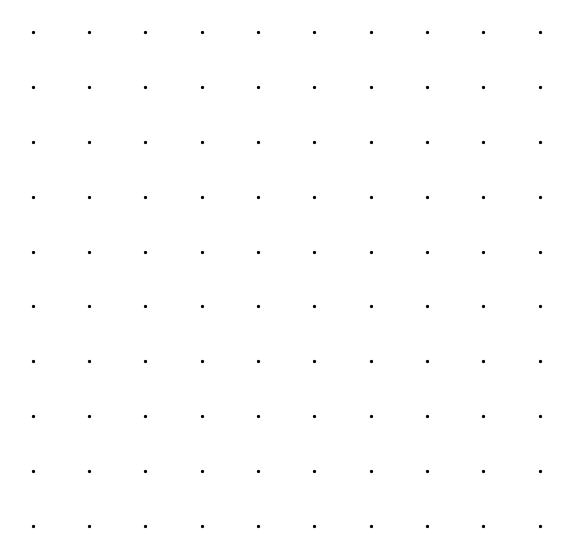

In [ ]:
#Malla rectangular
NG=10
xs=np.linspace(-1,1,NG)
ys=np.linspace(-1,1,NG)
zs=np.zeros(NG)

XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

plt.figure(figsize=(10,10))
plt.scatter(XS,YS,s=5,c='k')
plt.axis("off");

Campo vectorial:

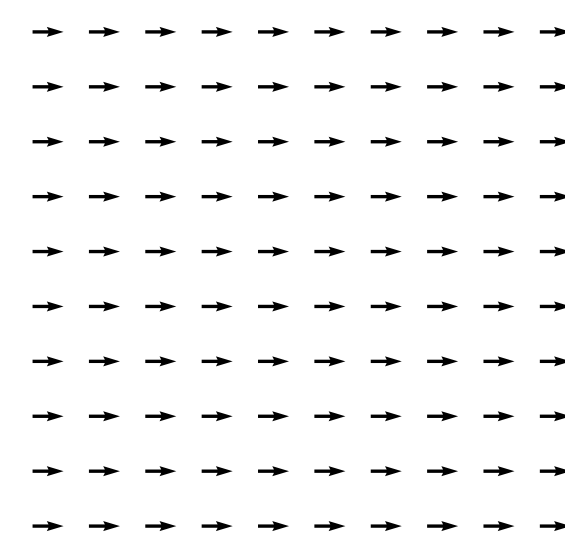

In [ ]:
a=1
b=2
t=0
VXS,VYS,VZS=vfield(XS,YS,ZS,t,(a,b))
plt.figure(figsize=(10,10))
plt.quiver(XS,YS,VXS,VYS)
plt.axis("off");

## Streamlines

Definimos la ecuación diferencial:

In [ ]:
def streamline(Y,t,t0,vfield,vpars):
  x,y,z=Y

  vx,vy,vz=vfield(x,y,z,t0,vpars)
  
  dxdt=vx
  dydt=vy
  dzdt=vz

  return [dxdt,dydt,dzdt]

La resolvemos para un valor definido de t0 con posiciones iniciales sobre el lado izquierdo e inferior de la malla:

(-1.0, 1.0, -1.0, 1.0)

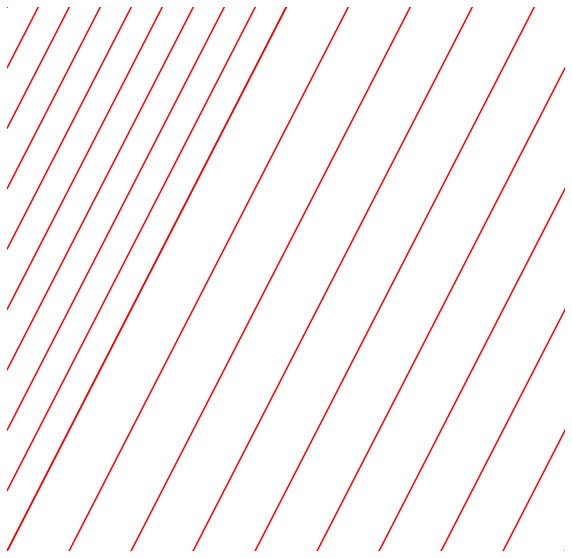

In [ ]:
t0=1
vpars=(1,2)

ts=np.linspace(0,10,100)
  
plt.figure(figsize=(10,10))
x=XS[0,0]
for y in YS[:,0]:
  Y0=[x,y,0]
  sols=odeint(streamline,Y0,ts,args=(t0,vfield,vpars))
  plt.plot(sols[:,0],sols[:,1],'r-')

y=YS[0,0]
for x in XS[0,:]:
  Y0=[x,y,0]
  sols=odeint(streamline,Y0,ts,args=(t0,vfield,vpars))
  plt.plot(sols[:,0],sols[:,1],'r-')

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.axis("off")

## Particle trajectories

In [ ]:
def particle_trajectory(Y,t,vfield,vpars):
  x,y,z=Y

  vx,vy,vz=vfield(x,y,z,t,vpars)

  dxdt=vx
  dydt=vy
  dzdt=vz

  return [dxdt,dydt,dzdt]

(-1.0, 1.0, -1.0, 1.0)

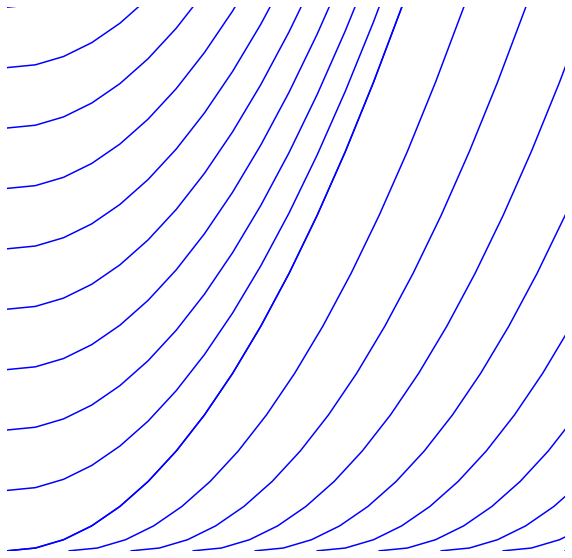

In [ ]:
t0=1
vpars=(1,2)
ts=np.linspace(0,10,100)
  
plt.figure(figsize=(10,10))

x=XS[0,0]
for y in YS[:,0]:
  Y0=[x,y,0]
  sols=odeint(particle_trajectory,Y0,ts,args=(vfield,vpars))
  plt.plot(sols[:,0],sols[:,1],'b-')

y=YS[0,0]
for x in XS[0,:]:
  Y0=[x,y,0]
  sols=odeint(particle_trajectory,Y0,ts,args=(vfield,vpars))
  plt.plot(sols[:,0],sols[:,1],'b-')

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.axis("off")

## Streaklines


Partiendo de un solo punto:

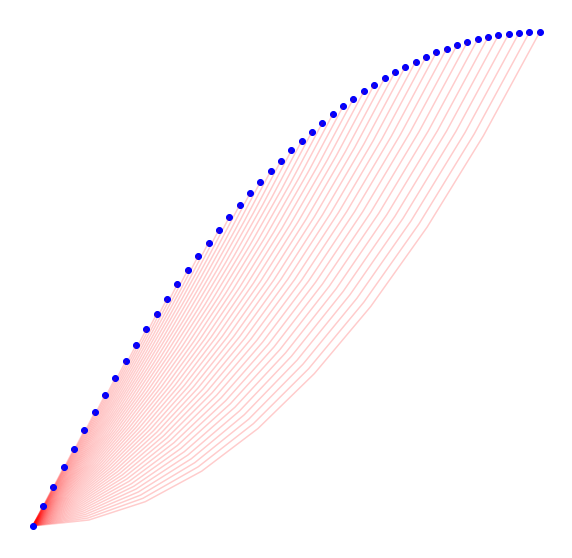

In [ ]:
t0=0
vpars=(1,2)
  
plt.figure(figsize=(10,10))

T=2
ts=np.linspace(t0,T,50)

x=XS[0,0]
y=YS[0,0]
Y0=[x,y,0]
for t in ts:
  sols=odeint(particle_trajectory,Y0,np.linspace(t,T,10),args=(vfield,vpars))
  plt.plot(sols[-1,0],sols[-1,1],'bo')
  plt.plot(sols[:,0],sols[:,1],'r-',alpha=0.2)

plt.axis("off");

Conjunto de líneas

(-1.0, 1.0, -1.0, 1.0)

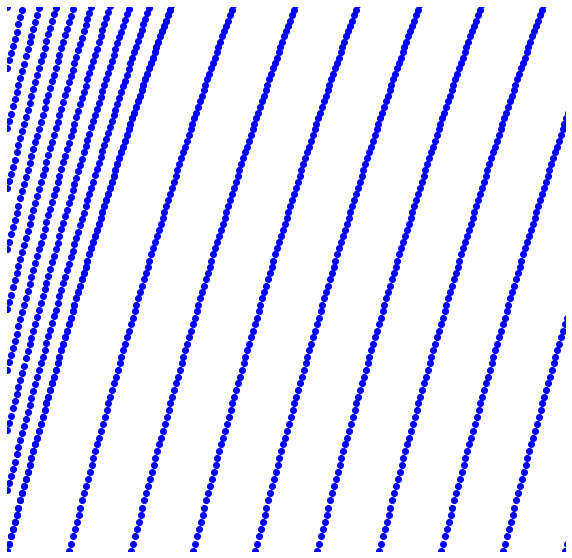

In [ ]:
t0=0
vpars=(1,2)
  
plt.figure(figsize=(10,10))

T=2
ts=np.linspace(t0,T,300)

x=XS[0,0]
for y in YS[:,0]:
  Y0=[x,y,0]
  for t in ts:
    sols=odeint(particle_trajectory,Y0,[t,T],args=(vfield,vpars))
    plt.plot(sols[-1,0],sols[-1,1],'bo')
    
y=YS[0,0]
for x in XS[0,:]:
  Y0=[x,y,0]
  for t in ts:
    sols=odeint(particle_trajectory,Y0,[t,T],args=(vfield,vpars))
    plt.plot(sols[1,0],sols[1,1],'bo')

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.axis("off")

## Todos en un solo gráfico

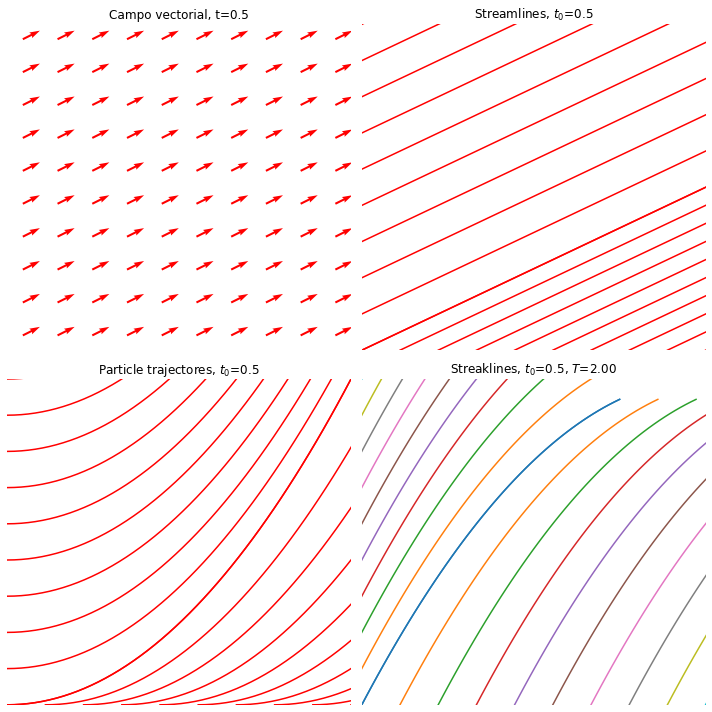

In [ ]:
# Campo de velocidades
def vfield(x,y,z,t,vpars):
  #Parámetros
  a,b=vpars

  #Componentes de la velocidad como vectores
  vx=a*np.ones_like(x)
  vy=b*t*np.ones_like(y)
  vz=0*np.ones_like(z)

  return [vx,vy,vz]

# Parámetros del campo
a=1
b=1
vpars=(a,b)
t0=0.5
T=2

# Grid
#Malla rectangular
NG=10
xs=np.linspace(-1,1,NG)
ys=np.linspace(-1,1,NG)
zs=np.zeros(NG)

XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

# Figura
fig,axs=plt.subplots(2,2,figsize=(10,10))

# Campo vectorial
VXS,VYS,VZS=vfield(XS,YS,ZS,t0,vpars)
ax=axs[0,0]
ax.quiver(XS,YS,VXS,VYS,color='r')
ax.set_title(f"Campo vectorial, t={t0}")
ax.axis("off");

# Stream lines
ax=axs[0,1]
ts=np.linspace(0,10,100)
x=XS[0,0]
for y in YS[:,0]:
  Y0=[x,y,0]
  sols=odeint(streamline,Y0,ts,args=(t0,vfield,vpars))
  ax.plot(sols[:,0],sols[:,1],'r-')

y=YS[0,0]
for x in XS[0,:]:
  Y0=[x,y,0]
  sols=odeint(streamline,Y0,ts,args=(t0,vfield,vpars))
  ax.plot(sols[:,0],sols[:,1],'r-')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_title(rf"Streamlines, $t_0$={t0}")
ax.axis("off")

# Particle trajectories
Nt=50
ax=axs[1,0]
ts=np.linspace(0,T,Nt)
xs=np.zeros(len(ts))
ys=np.zeros(len(ts))
  
x=XS[0,0]
for y in YS[:,0]:
  Y0=[x,y,0]
  sols=odeint(particle_trajectory,Y0,ts,args=(vfield,vpars))
  ax.plot(sols[:,0],sols[:,1],'r-')

y=YS[0,0]
for x in XS[0,:]:
  Y0=[x,y,0]
  sols=odeint(particle_trajectory,Y0,ts,args=(vfield,vpars))
  ax.plot(sols[:,0],sols[:,1],'r-')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_title(rf"Particle trajectores, $t_0$={t0}")
ax.axis("off")

# Streak lines
ax=axs[1,1]
ts=np.linspace(t0,T,Nt)

x=XS[0,0]
for y in YS[:,0]:
  Y0=[x,y,0]
  for i,t in enumerate(ts):
    sols=odeint(particle_trajectory,Y0,[t,T],args=(vfield,vpars))
    xs[i]=sols[1,0]
    ys[i]=sols[1,1]
  ax.plot(xs,ys,'-')
    
y=YS[0,0]
for x in XS[0,:]:
  Y0=[x,y,0]  
  for i,t in enumerate(ts):
    sols=odeint(particle_trajectory,Y0,[t,T],args=(vfield,vpars))
    xs[i]=sols[1,0]
    ys[i]=sols[1,1]
  ax.plot(xs,ys,'-')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_title(rf"Streaklines, $t_0$={t0}, $T$={T:.2f}")
ax.axis("off")

# Decoración
fig.tight_layout();

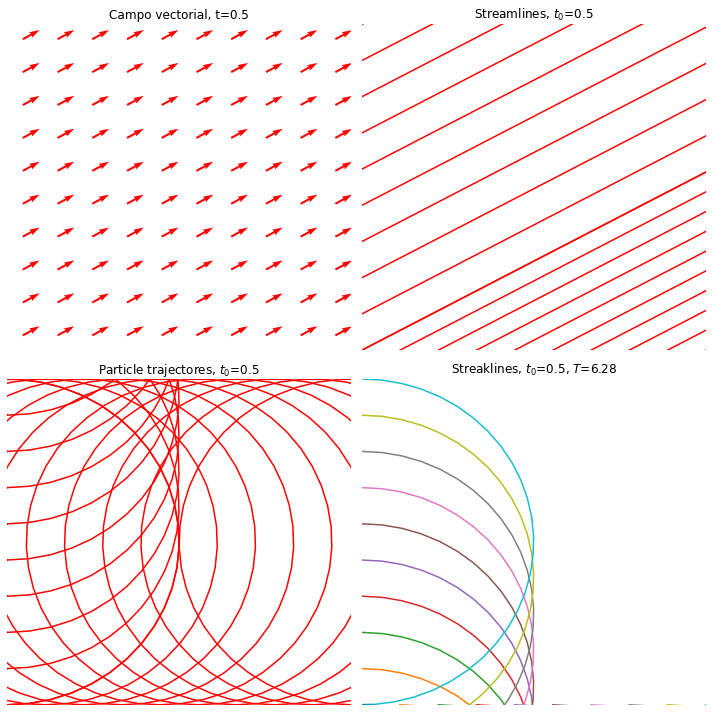

In [ ]:
# Campo de velocidades
def vfield(x,y,z,t,vpars):
  #Parámetros
  a,w=vpars

  #Componentes de la velocidad como vectores
  vx=a*np.cos(w*t)
  vy=a*np.sin(w*t)
  vz=0*np.ones_like(z)

  return [vx,vy,vz]

# Parámetros del campo
a=1
w=1
vpars=(a,w)
t0=0.5
T=2*np.pi

# Grid
#Malla rectangular
NG=10
xs=np.linspace(-1,1,NG)
ys=np.linspace(-1,1,NG)
zs=np.zeros(NG)

XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

# Figura
fig,axs=plt.subplots(2,2,figsize=(10,10))

# Campo vectorial
VXS,VYS,VZS=vfield(XS,YS,ZS,t0,vpars)
ax=axs[0,0]
ax.quiver(XS,YS,VXS,VYS,color='r')
ax.set_title(f"Campo vectorial, t={t0}")
ax.axis("off");

# Stream lines
ax=axs[0,1]
ts=np.linspace(0,10,100)
x=XS[0,0]
for y in YS[:,0]:
  Y0=[x,y,0]
  sols=odeint(streamline,Y0,ts,args=(t0,vfield,vpars))
  ax.plot(sols[:,0],sols[:,1],'r-')

y=YS[0,0]
for x in XS[0,:]:
  Y0=[x,y,0]
  sols=odeint(streamline,Y0,ts,args=(t0,vfield,vpars))
  ax.plot(sols[:,0],sols[:,1],'r-')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_title(rf"Streamlines, $t_0$={t0}")
ax.axis("off")

# Particle trajectories
Nt=50
ax=axs[1,0]
ts=np.linspace(0,T,Nt)
xs=np.zeros(len(ts))
ys=np.zeros(len(ts))
  
x=XS[0,0]
for y in YS[:,0]:
  Y0=[x,y,0]
  sols=odeint(particle_trajectory,Y0,ts,args=(vfield,vpars))
  ax.plot(sols[:,0],sols[:,1],'r-')

y=YS[0,0]
for x in XS[0,:]:
  Y0=[x,y,0]
  sols=odeint(particle_trajectory,Y0,ts,args=(vfield,vpars))
  ax.plot(sols[:,0],sols[:,1],'r-')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_title(rf"Particle trajectores, $t_0$={t0}")
ax.axis("off")

# Streak lines
ax=axs[1,1]
ts=np.linspace(t0,T,Nt)

x=XS[0,0]
for y in YS[:,0]:
  Y0=[x,y,0]
  for i,t in enumerate(ts):
    sols=odeint(particle_trajectory,Y0,[t,T],args=(vfield,vpars))
    xs[i]=sols[1,0]
    ys[i]=sols[1,1]
  ax.plot(xs,ys,'-')
    
y=YS[0,0]
for x in XS[0,:]:
  Y0=[x,y,0]  
  for i,t in enumerate(ts):
    sols=odeint(particle_trajectory,Y0,[t,T],args=(vfield,vpars))
    xs[i]=sols[1,0]
    ys[i]=sols[1,1]
  ax.plot(xs,ys,'-')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_title(rf"Streaklines, $t_0$={t0}, $T$={T:.2f}")
ax.axis("off")

# Decoración
fig.tight_layout();

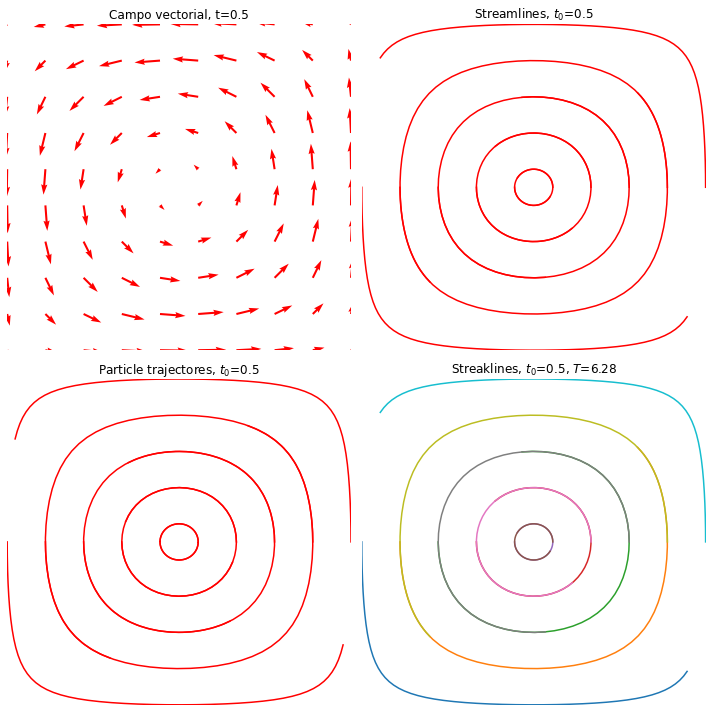

In [ ]:
# Campo de velocidades
def vfield(x,y,z,t,vpars):
  #Parámetros
  a,b=vpars

  #Componentes de la velocidad como vectores
  vx=a*np.sin(x)*np.cos(y)
  vy=-b*np.cos(x)*np.sin(y)
  vz=0*np.ones_like(z)

  return [vx,vy,vz]

# Parámetros del campo
a=1
b=1
vpars=(a,b)
t0=0.5
T=2*np.pi

# Grid
#Malla rectangular
NG=10
min=0.1
max=np.pi-0.1
xs=np.linspace(min,max,NG)
ys=np.linspace(min,max,NG)
zs=np.zeros(NG)

XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

# Figura
fig,axs=plt.subplots(2,2,figsize=(10,10))

# Campo vectorial
VXS,VYS,VZS=vfield(XS,YS,ZS,t0,vpars)
ax=axs[0,0]
ax.quiver(XS,YS,VXS,VYS,color='r')
ax.set_title(f"Campo vectorial, t={t0}")
ax.axis("off");

# Stream lines
ax=axs[0,1]
y=np.pi/2
for x in XS[0,:]:
  Y0=[x,y,0]
  sols=odeint(streamline,Y0,ts,args=(t0,vfield,vpars))
  ax.plot(sols[:,0],sols[:,1],'r-')
ax.set_title(rf"Streamlines, $t_0$={t0}")

# Particle trajectories
Nt=50
ax=axs[1,0]
ts=np.linspace(0,T,Nt)
xs=np.zeros(len(ts))
ys=np.zeros(len(ts))
  
y=np.pi/2
for x in XS[0,:]:
  Y0=[x,y,0]
  sols=odeint(particle_trajectory,Y0,ts,args=(vfield,vpars))
  ax.plot(sols[:,0],sols[:,1],'r-')

ax.set_title(rf"Particle trajectores, $t_0$={t0}")

# Streak lines
ax=axs[1,1]
ts=np.linspace(t0,T,Nt)

y=np.pi/2
for x in XS[0,:]:
  Y0=[x,y,0]
  for i,t in enumerate(ts):
    sols=odeint(particle_trajectory,Y0,[t,T],args=(vfield,vpars))
    xs[i]=sols[1,0]
    ys[i]=sols[1,1]
  ax.plot(xs,ys,'-')
ax.set_title(rf"Streaklines, $t_0$={t0}, $T$={T:.2f}")

for ax in axs.flatten():
  ax.set_xlim(min,max)
  ax.set_ylim(min,max)
  ax.axis("off")


# Decoración
fig.tight_layout();

## Rutina general

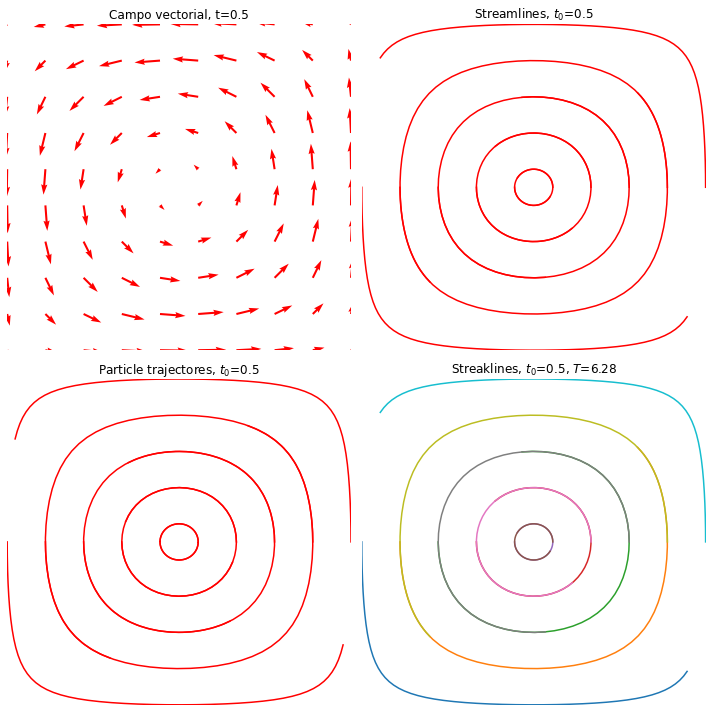

In [ ]:
##########################################################
# DEFINICIONES DEL CAMPO Y DEL MUESTREO
##########################################################
# Campo de velocidades
def vfield(x,y,z,t,vpars):
  #Parámetros
  a,b=vpars

  #Componentes de la velocidad como vectores
  vx=a*np.sin(x)*np.cos(y)
  vy=-b*np.cos(x)*np.sin(y)
  vz=0*np.ones_like(z)

  return [vx,vy,vz]

# Parámetros del campo
a=1
b=1
vpars=(a,b)
t0=0.5
T=2*np.pi
Nt=50

# Grid
#Malla rectangular
NG=10
min=0.1
max=np.pi-0.1
xs=np.linspace(min,max,NG)
ys=np.linspace(min,max,NG)
zs=np.zeros(NG)
XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

# Puntos iniciales de las streamlines, particle trajectories y streaklines
Y0s=[]
y=np.pi/2
for x in XS[0,:]:Y0s+=[[x,y,0]]

##########################################################
# GRÁFICO
##########################################################
# Figura
fig,axs=plt.subplots(2,2,figsize=(10,10))

# Campo vectorial
VXS,VYS,VZS=vfield(XS,YS,ZS,t0,vpars)
ax=axs[0,0]
ax.quiver(XS,YS,VXS,VYS,color='r')
ax.set_title(f"Campo vectorial, t={t0}")
ax.axis("off");

# Stream lines
ax=axs[0,1]
for Y0 in Y0s:
  sols=odeint(streamline,Y0,ts,args=(t0,vfield,vpars))
  ax.plot(sols[:,0],sols[:,1],'r-')
ax.set_title(rf"Streamlines, $t_0$={t0}")

# Particle trajectories
ax=axs[1,0]
ts=np.linspace(0,T,Nt)
xs=np.zeros(len(ts))
ys=np.zeros(len(ts))
  
for Y0 in Y0s:
  sols=odeint(particle_trajectory,Y0,ts,args=(vfield,vpars))
  ax.plot(sols[:,0],sols[:,1],'r-')
ax.set_title(rf"Particle trajectores, $t_0$={t0}")

# Streak lines
ax=axs[1,1]
ts=np.linspace(t0,T,Nt)

for Y0 in Y0s:
  for i,t in enumerate(ts):
    sols=odeint(particle_trajectory,Y0,[t,T],args=(vfield,vpars))
    xs[i]=sols[1,0]
    ys[i]=sols[1,1]
  ax.plot(xs,ys,'-')
ax.set_title(rf"Streaklines, $t_0$={t0}, $T$={T:.2f}")

for ax in axs.flatten():
  ax.set_xlim(min,max)
  ax.set_ylim(min,max)
  ax.axis("off")


# Decoración
fig.tight_layout();

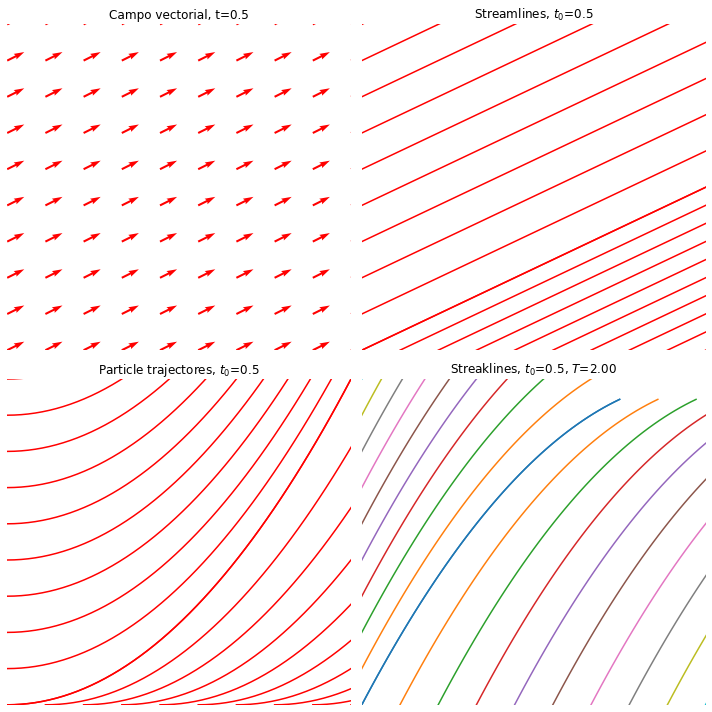

In [ ]:
##########################################################
# DEFINICIONES DEL CAMPO Y DEL MUESTREO
##########################################################
# Campo de velocidades
def vfield(x,y,z,t,vpars):
  #Parámetros
  a,b=vpars

  #Componentes de la velocidad como vectores
  vx=a*np.ones_like(x)
  vy=b*t*np.ones_like(y)
  vz=0*np.ones_like(z)

  return [vx,vy,vz]

# Parámetros del campo
a=1
b=1
vpars=(a,b)
t0=0.5
T=2

# Grid
#Malla rectangular
NG=10
min=-1
max=1
xs=np.linspace(min,max,NG)
ys=np.linspace(min,max,NG)
zs=np.zeros(NG)
XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

# Puntos iniciales de las streamlines, particle trajectories y streaklines
Y0s=[]
x=XS[0,0]
for y in YS[:,0]:Y0s+=[[x,y,0]]
y=YS[0,0]
for x in XS[0,:]:Y0s+=[[x,y,0]]

##########################################################
# GRÁFICO
##########################################################
# Figura
fig,axs=plt.subplots(2,2,figsize=(10,10))

# Campo vectorial
VXS,VYS,VZS=vfield(XS,YS,ZS,t0,vpars)
ax=axs[0,0]
ax.quiver(XS,YS,VXS,VYS,color='r')
ax.set_title(f"Campo vectorial, t={t0}")
ax.axis("off");

# Stream lines
ax=axs[0,1]
for Y0 in Y0s:
  sols=odeint(streamline,Y0,ts,args=(t0,vfield,vpars))
  ax.plot(sols[:,0],sols[:,1],'r-')
ax.set_title(rf"Streamlines, $t_0$={t0}")

# Particle trajectories
ax=axs[1,0]
ts=np.linspace(0,T,Nt)
xs=np.zeros(len(ts))
ys=np.zeros(len(ts))
  
for Y0 in Y0s:
  sols=odeint(particle_trajectory,Y0,ts,args=(vfield,vpars))
  ax.plot(sols[:,0],sols[:,1],'r-')
ax.set_title(rf"Particle trajectores, $t_0$={t0}")

# Streak lines
ax=axs[1,1]
ts=np.linspace(t0,T,Nt)

for Y0 in Y0s:
  for i,t in enumerate(ts):
    sols=odeint(particle_trajectory,Y0,[t,T],args=(vfield,vpars))
    xs[i]=sols[1,0]
    ys[i]=sols[1,1]
  ax.plot(xs,ys,'-')
ax.set_title(rf"Streaklines, $t_0$={t0}, $T$={T:.2f}")

for ax in axs.flatten():
  ax.set_xlim(min,max)
  ax.set_ylim(min,max)
  ax.axis("off")


# Decoración
fig.tight_layout();

$$
\vec v : (a \sin(x)\cos(\omega t),b \cos(x)\cos(\omega t),0)
$$